In [ ]:
import os
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
experiment_dir = '../work_dirs/aagcn/aagcn_pyskl_ntu60_xsub_3dkp'

The history saving thread hit an unexpected error (OperationalError('unable to open database file')).History will not be written to the database.


In [ ]:
interests = ['j_0.01_spatial2','j_0.01_spatial2_conv', 'j_0.01_spatial2_conv_gcl']

In [ ]:
def accumulateHistory(history):
    train = dict()
    valid = dict()
    for entry in history:
        if entry['mode'] == 'train':
            try:
                train[entry['epoch']].append(entry['loss_cls'])
            except KeyError:
                train[entry['epoch']] = [entry['loss_cls']]
        elif entry['mode'] == 'val':
            valid[entry['epoch']] = entry['top1_acc']
    train = {k: np.mean(v) for k, v in train.items()}
    return train, valid

In [ ]:
def getLastResult(file_name):
    with open(file_name, 'r') as file:
        data = "\n".join(file.readlines()[-9:])
    top1_accs = re.findall('top1_acc: ([0-9.]+)', data)
    return top1_accs[-2]

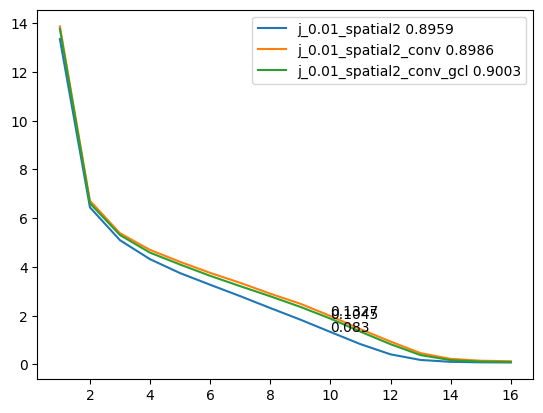

In [ ]:
for interest in interests:

    file_template = os.path.join(experiment_dir, interest, "*.log")
    glob_files = glob.glob(file_template)
    glob_files.sort(reverse = True)
    log_file = glob_files[0]
    
    result = getLastResult(log_file)

    file_template = os.path.join(experiment_dir, interest, "*.log.json")
    glob_files = glob.glob(file_template)
    glob_files.sort(reverse = True)
    log_file = glob_files[0]

    
    with open(log_file, 'r') as file:
        history = [json.loads(line.strip()) for line in file.readlines()][1:]
    train, _ = accumulateHistory(history)
    epochs = list(train.keys())
    losses = list(train.values())
    plt.plot(epochs, losses, label = interest + " " + str(result))
    plt.text(epochs[-7], losses[-7], round(losses[-1], 4))
    plt.legend()
plt.show()

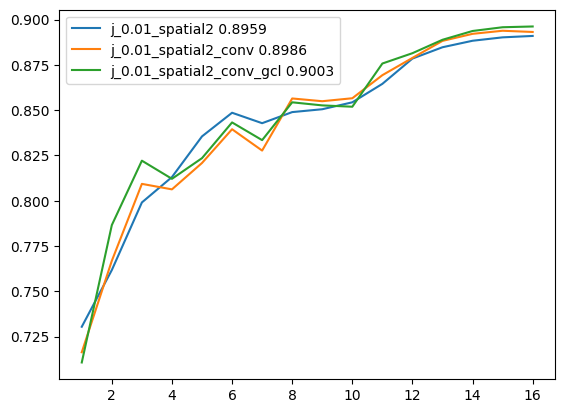

: 

In [ ]:
for interest in interests:

    file_template = os.path.join(experiment_dir, interest, "*.log")
    glob_files = glob.glob(file_template)
    glob_files.sort(reverse = True)
    log_file = glob_files[0]
    
    result = getLastResult(log_file)

    file_template = os.path.join(experiment_dir, interest, "*.log.json")
    glob_files = glob.glob(file_template)
    glob_files.sort(reverse = True)
    log_file = glob_files[0]

    
    with open(log_file, 'r') as file:
        history = [json.loads(line.strip()) for line in file.readlines()][1:]
    _, valid = accumulateHistory(history)
    epochs = list(valid.keys())
    accuracies = list(valid.values())
    plt.plot(epochs, accuracies, label = interest + " " + str(result))
    # plt.text(epochs[-10], accuracies[-1], result)
    plt.legend()
plt.show()